In [12]:

pip install matplotlib 


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.


In [13]:
pip install seaborn 

You should consider upgrading via the 'C:\Python\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 292.8/292.8 KB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 38.6/38.6 MB 4.6 MB/s eta 0:00:00


In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [17]:
df=pd.read_csv('E:\project ipl _py/deliveries.csv')


In [19]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [21]:
score=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
score

,match_id,inning,batting_team,total_runs
0,1,1,Sunrisers Hyderabad,207
1,1,2,Royal Challengers Bangalore,172
2,2,1,Mumbai Indians,184
3,2,2,Rising Pune Supergiant,187
4,3,1,Gujarat Lions,183
...,...,...,...,...
1279,634,2,Kolkata Knight Riders,140
1280,635,1,Gujarat Lions,162
1281,635,2,Sunrisers Hyderabad,163
1282,636,1,Sunrisers Hyderabad,208


In [24]:
filt=df['batsman']=='DA Warner'
df_warner=df[filt]
df_warner.shape


(2902, 21)

In [35]:
df_warner_runs=df_warner.groupby(['match_id'])['total_runs'].sum().reset_index()
df_warner_runs

,match_id,total_runs
0,1,17
1,6,78
2,10,52
3,14,28
4,19,77
...,...,...
109,628,73
110,631,18
111,634,30
112,635,94


In [38]:
filt=df_warner_runs['total_runs']>=100
df_warner_cent=df_warner_runs[filt]
df_warner_cent

,match_id,total_runs
8,36,127
24,200,111
45,331,119


In [46]:
df_warner_cent['total_runs'].reset_index()

,index,total_runs
0,8,127
1,24,111
2,45,119


<AxesSubplot:ylabel='dismissal_kind'>

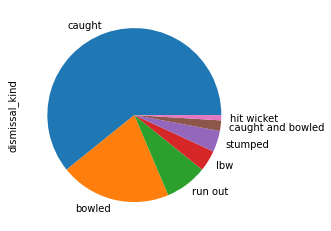

In [58]:
df_warner['dismissal_kind'].value_counts().plot.pie()

In [59]:
len(df_warner[df_warner['batsman_runs']==4])

401

In [60]:
len(df_warner[df_warner['batsman_runs']==6])

160

In [78]:
def count(df,runs):
    len(df_warner[df_warner['batsman_runs']==runs])
    return (len(df_warner[df_warner['batsman_runs']==runs])*runs)

In [62]:
count(df,1)

997

In [63]:
count(df_warner,4)

1604

([<matplotlib.patches.Wedge at 0x18175a3dab0>,
 [Text(0.7854783829880112, 0.9072065420060305, '1'),
  Text(-0.5748106918016787, 1.0533720466152858, '2'),
  Text(-1.0171391777250371, 0.8255470266052901, '3'),
  Text(-0.893566462381574, -0.8009612832758394, 'chouka'),
  Text(1.0438420815832636, -0.5919406293843325, 'chakka')],
 [Text(0.45819572340967313, 0.5292038161701844, '27.3%'),
  Text(-0.3353062368843125, 0.61446702719225, '11.3%'),
  Text(-0.6289181175246412, 0.5104527416414388, '1.1%'),
  Text(-0.5212471030559181, -0.4672274152442396, '43.9%'),
  Text(0.6089078809235704, -0.34529870047419386, '16.4%')])

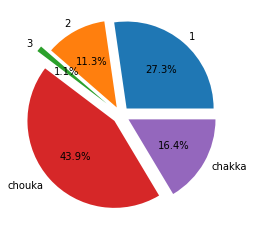

In [102]:
slices=[997,414,39,1604,600]
labes=[1,2,3,'chouka','chakka']
explode=[0.1,0.1,0.1,0.1,.1]
plt.pie(slices,labels=labes,autopct='%1.1f%%',explode=explode)

In [140]:
df['bowling_team'].unique()
    

array([nan], dtype=object)

In [143]:
Teams={
    'Sunrisers Hyderabad':'SRH',
    'Royal Challengers Bangalore':'RCB',
       'Mumbai Indians':'MI',
    'Rising Pune Supergiant':'RPS', 
    'Gujarat Lions':'GL',
       'Kolkata Knight Riders':'KKR', 
    'Kings XI Punjab':'KXIP', 'Delhi Daredevils':'DD',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DC',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS'
}

In [144]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)

In [145]:
df['batting_team'].unique()

array([nan], dtype=object)

In [146]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [149]:
dfw=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum()

In [151]:
dfw

Series([], Name: total_runs, dtype: int64)

In [152]:
df=pd.read_csv('E:\project ipl _py/deliveries.csv')

In [153]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [154]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [155]:
Teams={
    'Sunrisers Hyderabad':'SRH', 'Royal Challengers Bangalore':'RCB',
       'Mumbai Indians':'MI', 'Rising Pune Supergiant':'RPS', 'Gujarat Lions':'GL',
       'Kolkata Knight Riders':'KKR', 'Kings XI Punjab':'KXIP', 'Delhi Daredevils':'DD',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DC',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS'
}

In [156]:
df['batting_team']=df['batting_team'].map(Teams)
df['bowling_team']=df['bowling_team'].map(Teams)


In [157]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,RCB,SRH,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,RCB,SRH,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,RCB,SRH,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,RCB,SRH,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [160]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()

In [166]:
runs_200=runs[runs['total_runs']>=200]
runs_200

,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
16,9,1,DD,205
38,20,1,RCB,213
62,32,1,SRH,207
72,36,1,SRH,209
...,...,...,...,...
1250,620,1,RCB,248
1256,623,1,MI,206
1262,626,1,RCB,211
1282,636,1,SRH,208


In [178]:
inning1=runs[runs['inning']==1]
inning2=runs_200[runs_200['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

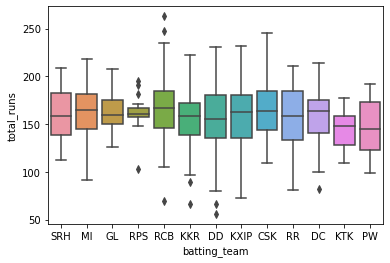

In [179]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

In [187]:
len(runs_200[runs_200['batting_team']=='SRH'])

6

C:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

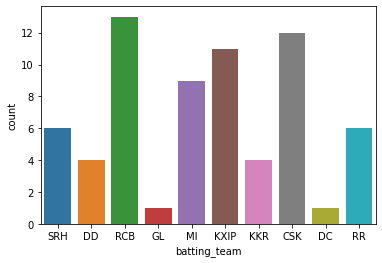

In [191]:
sns.countplot(runs_200['batting_team'])

In [189]:
runs_200['batting_team'].value_counts()

RCB     13
CSK     12
KXIP    11
MI       9
SRH      6
RR       6
DD       4
KKR      4
GL       1
DC       1
Name: batting_team, dtype: int64

In [193]:
df.groupby(['match_id','inning','batting_team','batsman'])['total_runs'].sum().reset_index()

,match_id,inning,batting_team,batsman,total_runs
0,1,1,SRH,BCJ Cutting,16
1,1,1,SRH,DA Warner,17
2,1,1,SRH,DJ Hooda,16
3,1,1,SRH,MC Henriques,52
4,1,1,SRH,S Dhawan,41
...,...,...,...,...,...
9542,636,2,RCB,KL Rahul,11
9543,636,2,RCB,SR Watson,11
9544,636,2,RCB,STR Binny,10
9545,636,2,RCB,Sachin Baby,18


In [197]:
balls=df.groupby('batsman')['ball'].count().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57
...,...,...
456,YV Takawale,183
457,Yashpal Singh,67
458,Younis Khan,7
459,Yuvraj Singh,2050


In [201]:
runss=df.groupby('batsman')['batsman_runs'].sum().reset_index()
runss

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


In [202]:
four=df[df['batsman_runs']==4]
four

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150403,636,2,RCB,SRH,11,4,V Kohli,AB de Villiers,BCJ Cutting,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150407,636,2,RCB,SRH,12,2,V Kohli,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150418,636,2,RCB,SRH,14,1,KL Rahul,AB de Villiers,Bipul Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150447,636,2,RCB,SRH,18,6,Sachin Baby,STR Binny,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [204]:
df_warner['dismissal_kind'].value_counts()

caught               62
bowled               21
run out               8
lbw                   4
stumped               4
caught and bowled     2
hit wicket            1
Name: dismissal_kind, dtype: int64

In [206]:
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4

,batsman,batsman_runs
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [208]:
runs_4.columns=['batsman','4s']
runs_4


,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3
...,...,...
363,YK Pathan,240
364,YV Takawale,26
365,Yashpal Singh,5
366,Yuvraj Singh,205


In [209]:
six=df[df['batsman_runs']==6]
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
10,1,1,SRH,RCB,2,4,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
47,1,1,SRH,RCB,8,4,MC Henriques,S Dhawan,TM Head,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
75,1,1,SRH,RCB,13,2,Yuvraj Singh,MC Henriques,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
89,1,1,SRH,RCB,15,3,Yuvraj Singh,MC Henriques,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
91,1,1,SRH,RCB,15,5,MC Henriques,Yuvraj Singh,S Aravind,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150395,636,2,RCB,SRH,10,2,V Kohli,CH Gayle,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150413,636,2,RCB,SRH,13,2,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150428,636,2,RCB,SRH,15,5,SR Watson,KL Rahul,MC Henriques,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
150440,636,2,RCB,SRH,17,5,STR Binny,Sachin Baby,Mustafizur Rahman,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

In [221]:
player=pd.concat([runss,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player.head()

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0


In [224]:
player.fillna(0,inplace=True)
player

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0
...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0
457,Yashpal Singh,47,67,0.0,0.0
458,Younis Khan,3,7,0.0,0.0
459,Yuvraj Singh,2591,2050,0.0,0.0


In [225]:
player['strike_rate']=(player['batsman_runs']/player['ball'])*100
player

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930
...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033
457,Yashpal Singh,47,67,0.0,0.0,70.149254
458,Younis Khan,3,7,0.0,0.0,42.857143
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244


In [231]:
grp=df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16
...,...,...,...,...
9510,636,SR Watson,RCB,11
9511,636,STR Binny,RCB,9
9512,636,Sachin Baby,RCB,18
9513,636,V Kohli,RCB,54


In [246]:
x=grp.groupby('batsman')['batsman_runs'].max().reset_index()
x.columns=['batsman','max_runs']
x

,batsman,max_runs
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24
...,...,...
456,YV Takawale,45
457,Yashpal Singh,20
458,Younis Khan,3
459,Yuvraj Singh,83


In [248]:
pd.concat([player,x.iloc[:,1]],axis=1)

,batsman,batsman_runs,ball,4s,6s,strike_rate,max_runs
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,36
1,A Chandila,4,7,7.0,1.0,57.142857,4
2,A Chopra,53,75,1.0,2.0,70.666667,24
3,A Choudhary,25,20,5.0,5.0,125.000000,15
4,A Flintoff,62,57,3.0,1.0,108.771930,24
...,...,...,...,...,...,...,...
456,YV Takawale,192,183,0.0,0.0,104.918033,45
457,Yashpal Singh,47,67,0.0,0.0,70.149254,20
458,Younis Khan,3,7,0.0,0.0,42.857143,3
459,Yuvraj Singh,2591,2050,0.0,0.0,126.390244,83


<AxesSubplot:xlabel='batsman'>

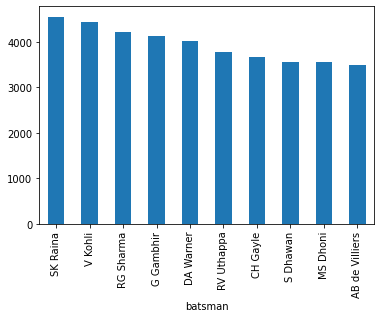

In [270]:
max_runs=df.groupby('batsman')['batsman_runs'].sum()
max_runs.sort_values(ascending=False)[:10].plot(kind='bar')


In [273]:
grp.sort_values(by='batsman_runs',ascending=False).head(10)

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
3686,243,PC Valthaty,KXIP,120
4223,279,V Sehwag,DD,119


In [275]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [279]:
wicket_taker=df.groupby(['match_id','bowler'])['dismissal_kind'].count().reset_index()
wicket_taker

,match_id,bowler,dismissal_kind
0,1,A Choudhary,1
1,1,A Nehra,2
2,1,B Kumar,2
3,1,BCJ Cutting,1
4,1,Bipul Sharma,1
...,...,...,...
7566,636,MC Henriques,0
7567,636,Mustafizur Rahman,2
7568,636,S Aravind,2
7569,636,SR Watson,1


In [282]:
wicket_taker.groupby('bowler')['dismissal_kind'].sum().reset_index().sort_values(by='dismissal_kind',ascending=False)[:10]

,bowler,dismissal_kind
294,SL Malinga,170
5,A Mishra,142
88,DJ Bravo,137
117,Harbhajan Singh,136
229,PP Chawla,133
244,R Vinay Kumar,125
7,A Nehra,121
355,Z Khan,119
50,B Kumar,117
234,R Ashwin,110


In [283]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [290]:
dismissal_kinds=['caught', 'bowled',  'lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [291]:
hwt=df[df['dismissal_kind'].isin(dismissal_kinds)]
hwt.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


<AxesSubplot:>

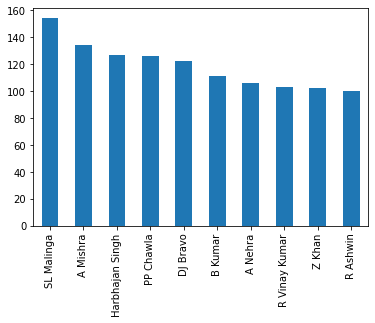

In [293]:
hwt['bowler'].value_counts()[:10].plot(kind='bar')